In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math as math
import pybinding as pb
from pybinding.repository import graphene
pb.pltutils.use_style()
from IPython.display import display, HTML

# System

## System_ImportantConstant

In [2]:
a = 3*graphene.a_cc # lattice length.
a_cc = graphene.a_cc # carbon-carbon bond length
t = graphene.t # hopping energy of graphene.
leng = 18*graphene.a_cc #lengh of supercell that I wanna make
m = 0.001 
plt.rcParams.update({'font.size': 15})


#Topological -> 위상 기하적
#넓은것과 좁은것이 또 합쳐저서 하나의 unit cel이 됨.
#상태에 따라서 에너지나 property가 많이 달라짐.
# LAPACK -> exact diag . must in small system.


## System_Armchair Graphene

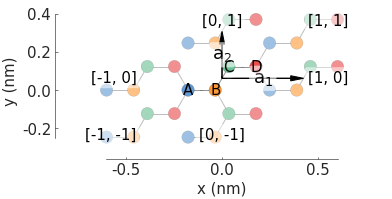

In [3]:
import math as math

def arm_chair_graphene() :
    
    lat = pb.Lattice(a1=[a,0], a2 = [0,math.sqrt(3)*a_cc]) #lattice vector
    
    lat.add_sublattices(
        ('A',[-5/4*a_cc,0/4*a_cc]),
        ('B',[-1/4*a_cc,0/4*a_cc]),
        ('C',[1/4*a_cc,2*math.sqrt(3)/4*a_cc]),
        ('D',[5/4*a_cc,2*math.sqrt(3)/4*a_cc])
        )
                        
    lat.add_hoppings(
        ([0,0], 'A', 'B', t),
        ([0,0], 'B', 'C', t),
        ([0,0], 'C', 'D', t),
        ([-1,0],'A','D',t),
        ([0,-1],'B','C',t), 
        ([1,1],'D','A',t) 
    )
    
    return lat


arm_chair = arm_chair_graphene()
arm_chair.plot()
plt.show()

## System_Superlattice Frame

In [12]:
def shape(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=2*int(inp2)*math.sqrt(3)*a_cc+m*50) 
    rect_exc = pb.rectangle(x=3*a, y=(int(inp4)*2-2)*math.sqrt(3)*a_cc) # rectangle that wil lbe excluded
   
    tr_rect = rect.with_offset([leng*(T-1),0])
    tr_rect_down = rect_exc.with_offset([2*a+leng*(T-1), +a_cc-math.sqrt(3)*2*a_cc+m-(int(inp2)*2-2)/2*math.sqrt(3)*a_cc]) #3/2*a_cc
    tr_rect_up = rect_exc.with_offset([2*a+leng*(T-1), -a_cc+math.sqrt(3)*2*a_cc-m+(int(inp2)*2-2)/2*math.sqrt(3)*a_cc]) #3/2*a_cc
    shape_1 = tr_rect -tr_rect_up - tr_rect_down 

    return shape_1


def shape_lin(T) : # T is the period of the shape
    rect = pb.rectangle(x=leng, y=2*int(inp2)*math.sqrt(3)*a_cc+m*50) 
    tr_rect = rect.with_offset([leng*(T-1),0])
    shape_1 = tr_rect 
    return shape_1

# Superlattice

## Superlattice_StructureA

N = input*4 + 1. 단, input>0
5
How many supercell you want to make?... 2 
2


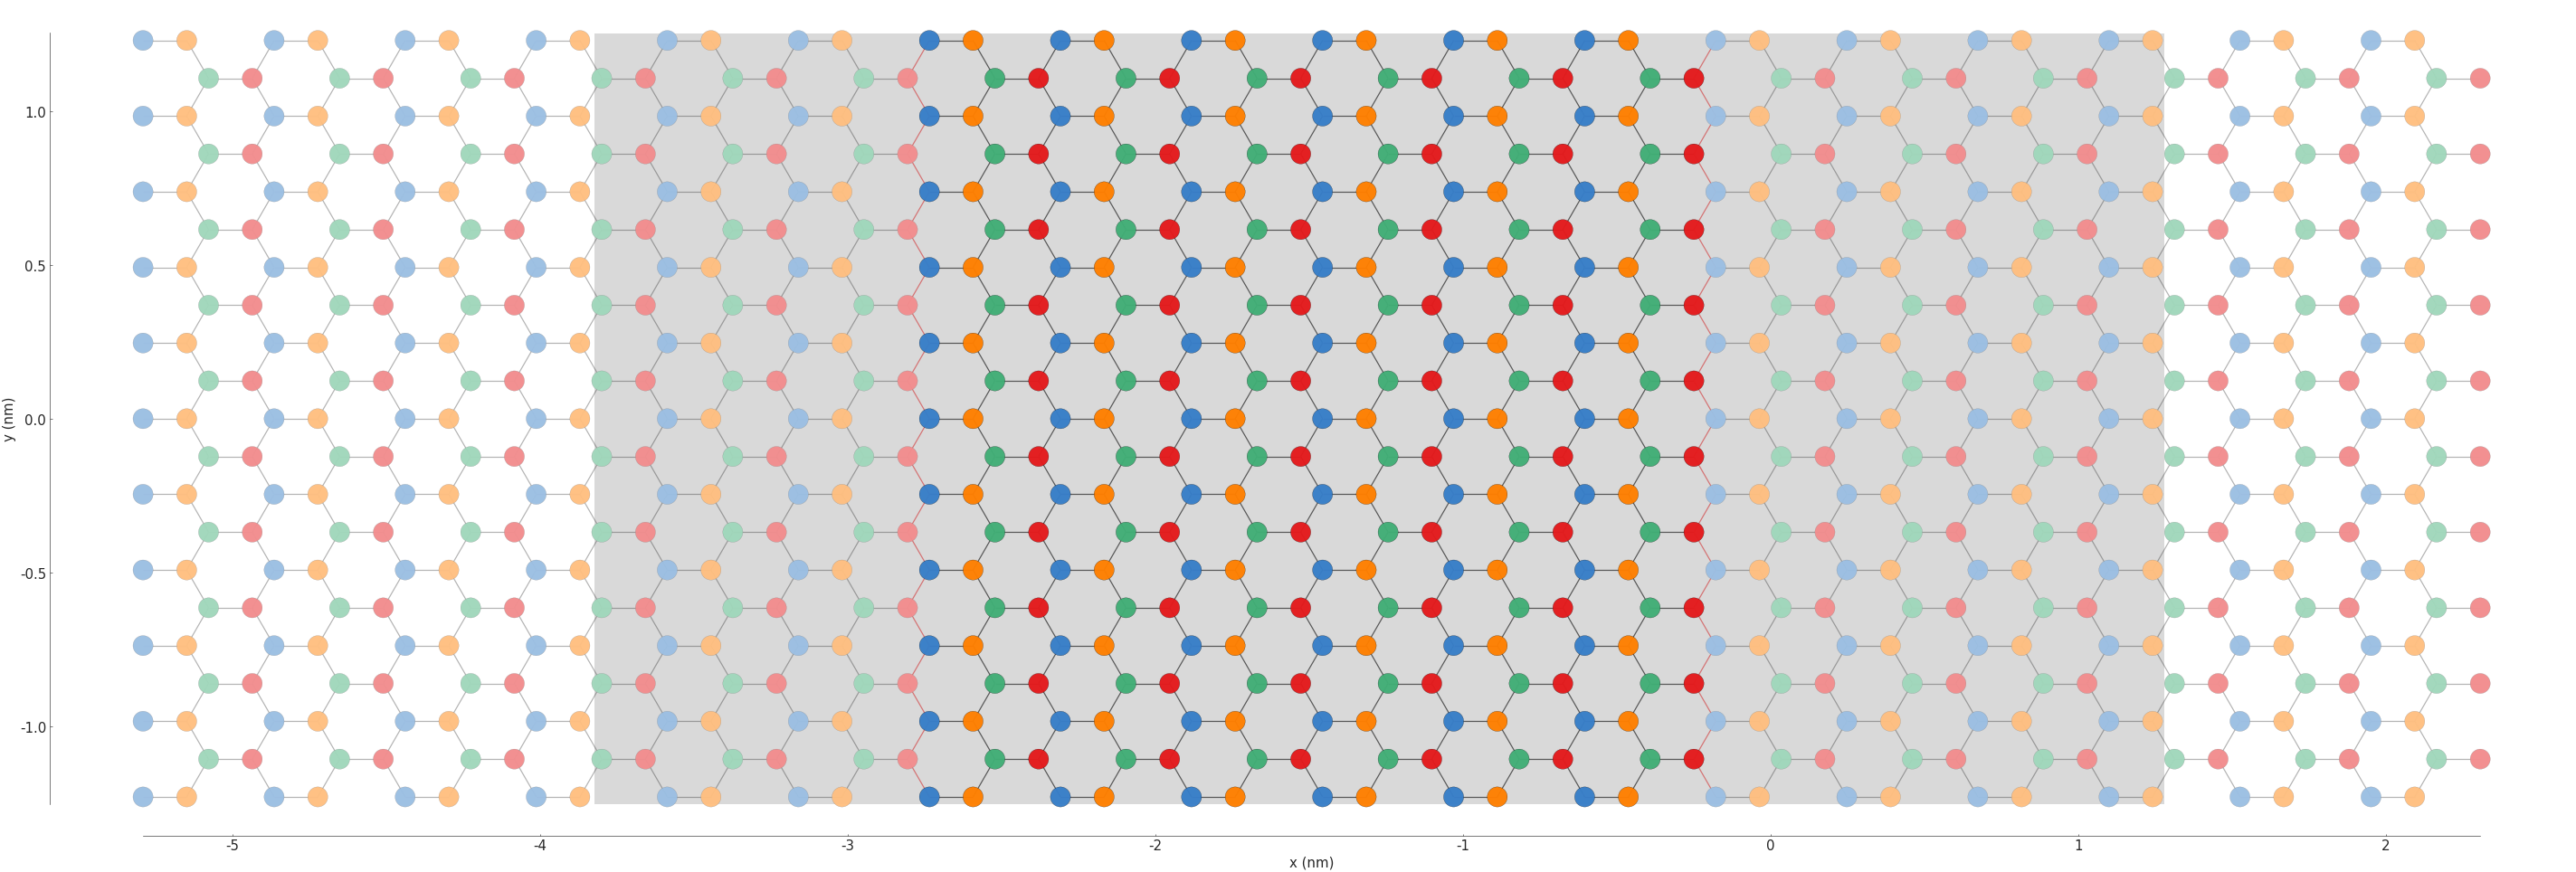

In [5]:
print("N = input*4 + 1. 단, input>0")
inp2 = input()
print('How many supercell you want to make?... 2 ')
inp = input() 

supercell_A = shape_lin(0)
for i in range (0,int(inp)) :
    supercell_A += shape_lin(i)
    
plt.figure(figsize=(50, 20.6))
arm_gra_A = pb.Model(arm_chair.with_min_neighbors(2), supercell_A, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_A.plot()
supercell_A.plot()
#arm_gra.shape.plot()

## Superlattice_StructureB

몇층을 더 쌓고싶으신가요? Default = 5 ... 2
2
How many supercell you want to make?... 2 
2


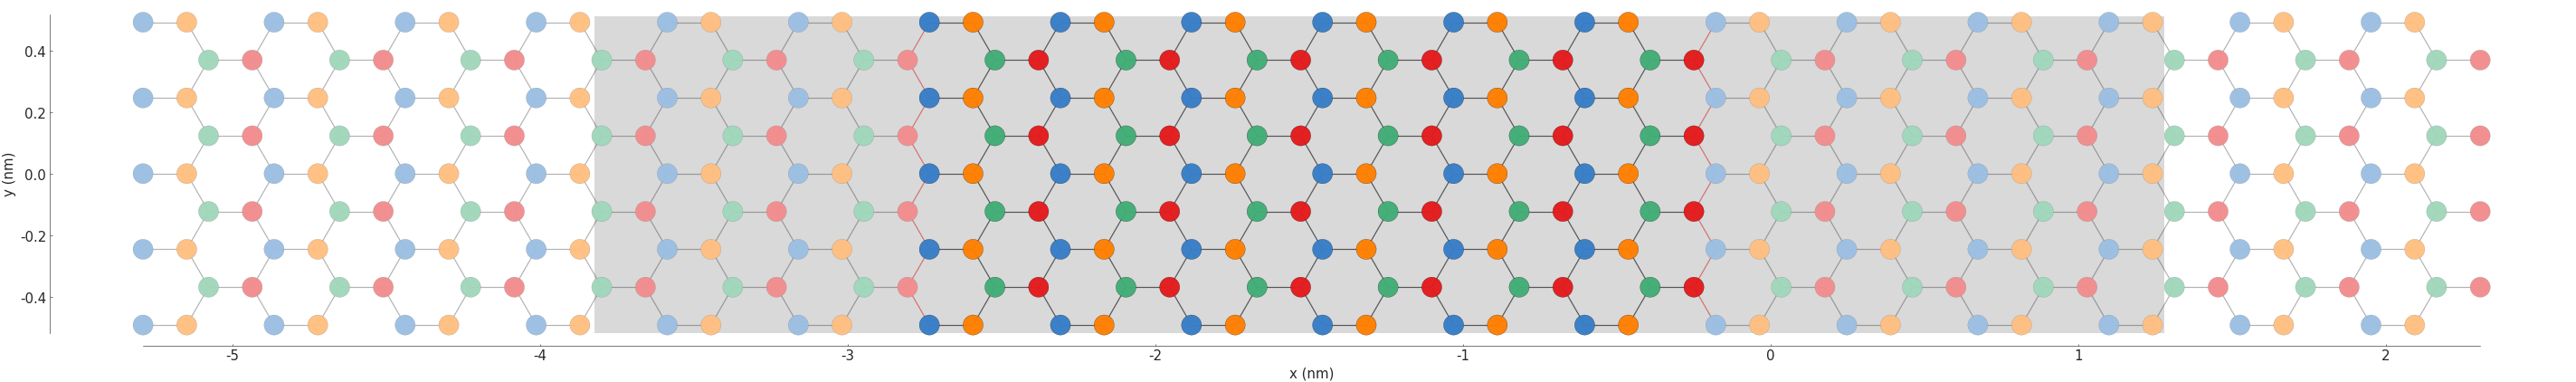

In [6]:
print("몇층을 더 쌓고싶으신가요? Default = 5 ... 2" )
inp2 = input()
print('How many supercell you want to make?... 2 ')
inp = input() 

supercell_A = shape_lin(0)
for i in range (0,int(inp)) :
    supercell_A += shape_lin(i)
    
plt.figure(figsize=(50, 20.6))
arm_gra_B = pb.Model(arm_chair.with_min_neighbors(2), supercell_A, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_B.plot()
supercell_A.plot()
#arm_gra.shape.plot()

## Superlattice_StructureC

몇층을 더 쌓고싶으신가요? Default = 5 ... 2
5
몇층을 더 깎고싶으신가요? Default = 1 ...2 
4
How many supercell you want to make?... 2 
2


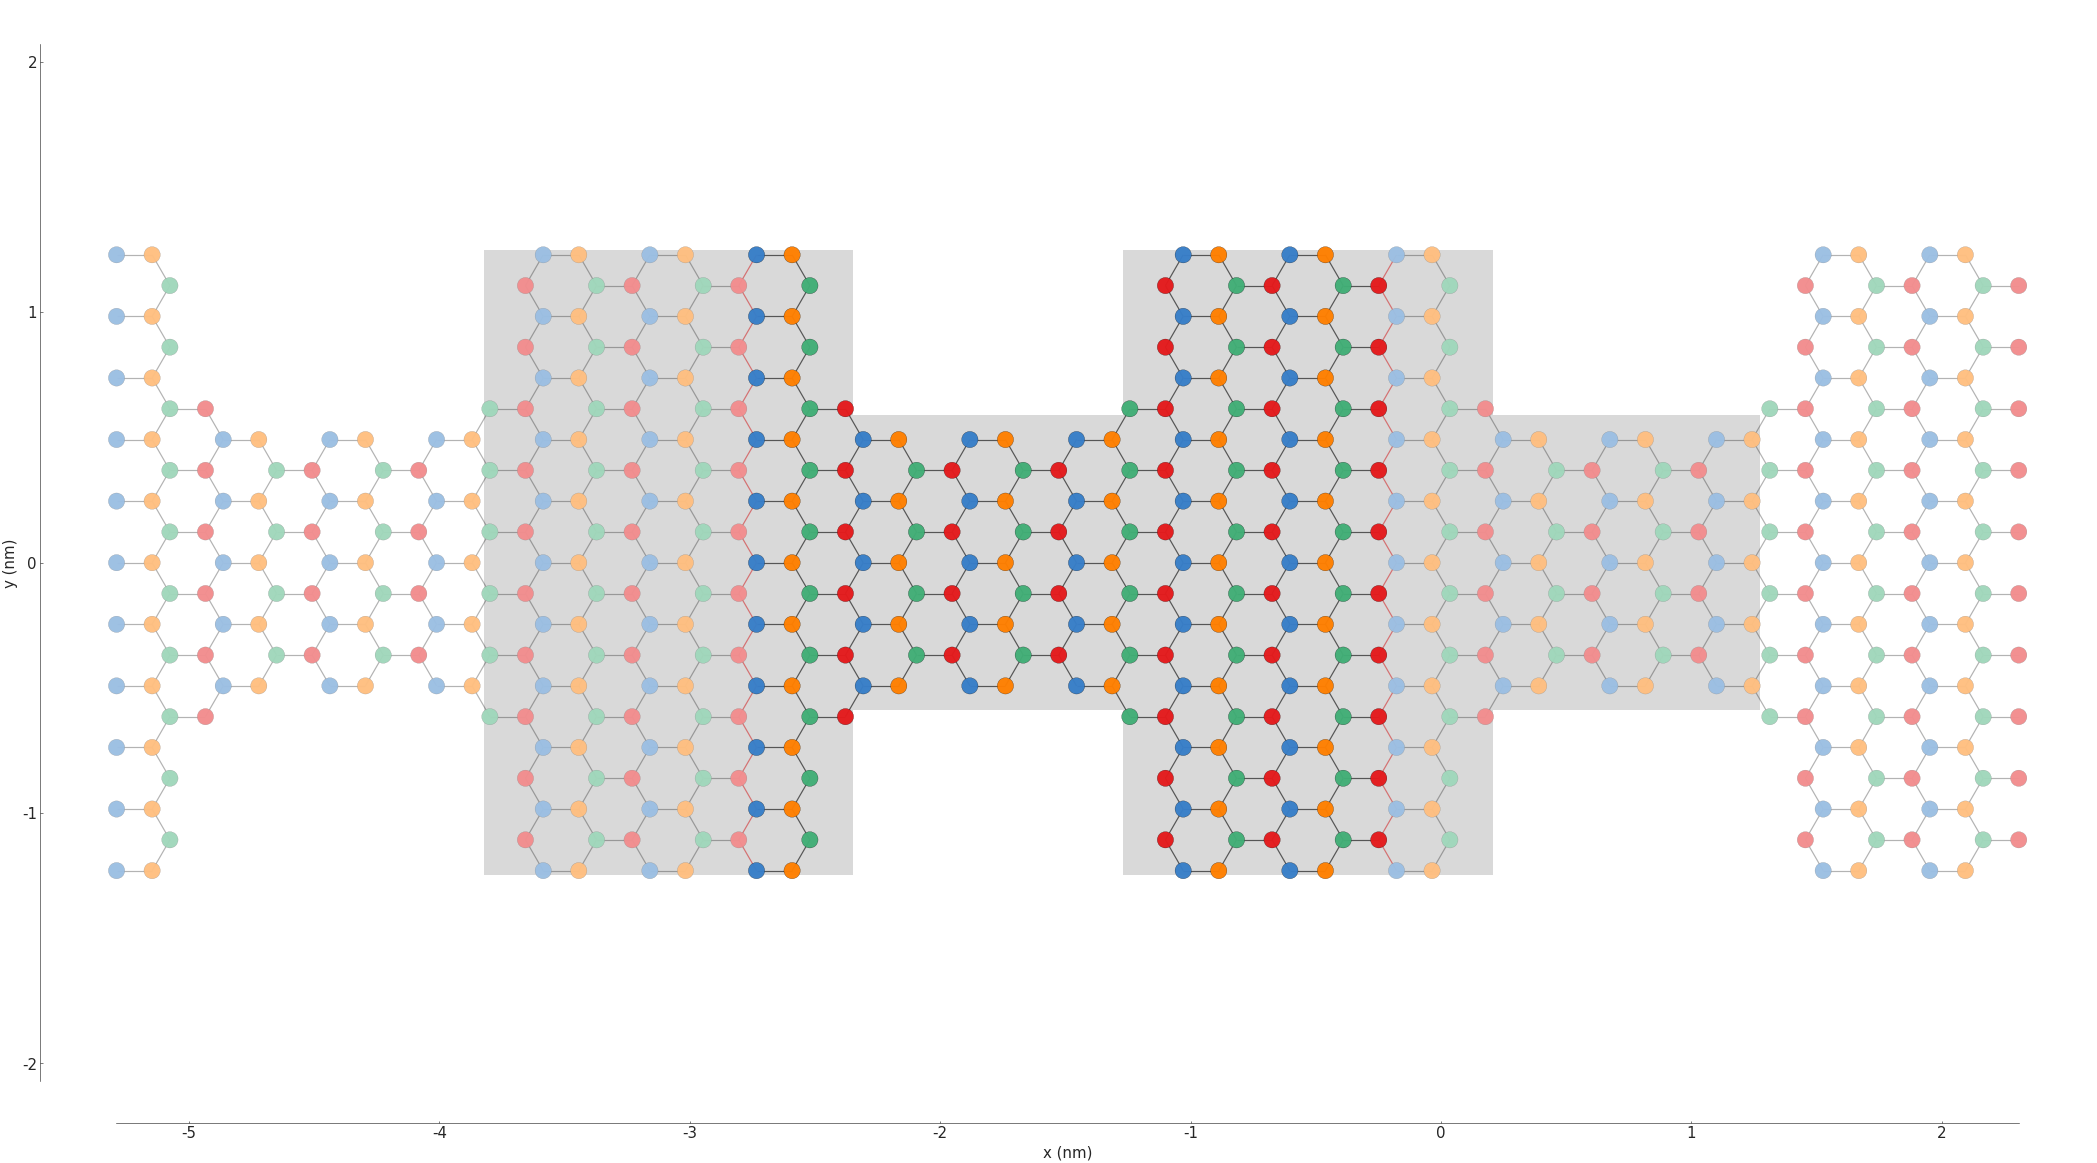

In [13]:
print("몇층을 더 쌓고싶으신가요? Default = 5 ... 2" )
inp2 = input()
print("몇층을 더 깎고싶으신가요? Default = 1 ...2 ")
inp4 = input()
print('How many supercell you want to make?... 2 ')
inp = input() 

supercell_A = shape(0)
for i in range (0,int(inp)) :
    supercell_A += shape(i)
    
plt.figure(figsize=(50, 20.6))
arm_gra_C = pb.Model(arm_chair.with_min_neighbors(2), supercell_A, pb.translational_symmetry(a1=(int(inp)-1)*12*(a_cc+a_cc/2) ,a2=False))
arm_gra_C.plot()
supercell_A.plot()
#arm_gra.shape.plot()

# DATA

## Energy

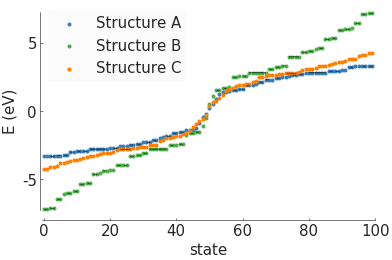

In [14]:
plt.plot(figsize=(25, 25))

solverA = pb.solver.arpack(arm_gra_A, k=100)  # for the 20 lowest energy eig_val_
solverB = pb.solver.arpack(arm_gra_B, k=100)  # for the 20 lowest energy eig_val_
solverC = pb.solver.arpack(arm_gra_C, k=100)  # for the 20 lowest energy eig_val_
eig_val_A = solverA.calc_eigenvalues()
eig_val_A.plot(label="Structure A", c='C1')
eig_val_B = solverB.calc_eigenvalues()
eig_val_B.plot(label="Structure B", c='C2')
eig_val_C = solverC.calc_eigenvalues()
eig_val_C.plot(label="Structure C", c='C4')


pb.pltutils.legend()

## DOS

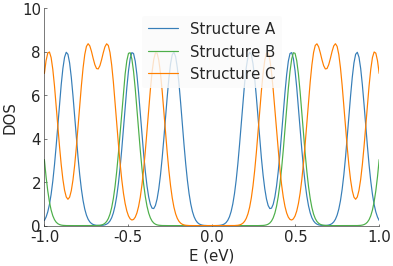

In [15]:
plt.plot(figsize=(25, 25))

dosA = solverA.calc_dos(energies=np.linspace(-1, 1, 200), broadening=0.05)  # [eV]
dosA.plot(label="Structure A", c='C1')

dosB = solverB.calc_dos(energies=np.linspace(-1, 1, 200), broadening=0.05)  # [eV]
dosB.plot(label="Structure B", c='C2')

dosC = solverC.calc_dos(energies=np.linspace(-1, 1, 200), broadening=0.05)  # [eV]
dosC.plot(label="Structure C", c='C4')

pb.pltutils.legend()

## LDOS_usingKPM

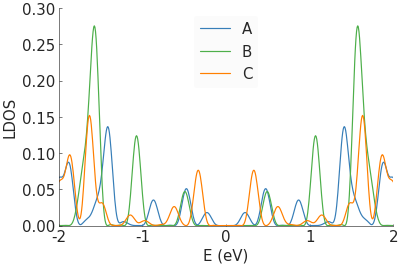

In [16]:
kpmA = pb.kpm(arm_gra_A)
kpmB = pb.kpm(arm_gra_B)
kpmC = pb.kpm(arm_gra_C)

ldosA = kpmA.calc_ldos(energy=np.linspace(-9, 9, 2500), broadening=0.05,position=[0, 0])
ldosB = kpmB.calc_ldos(energy=np.linspace(-9, 9, 2500), broadening=0.05,position=[0, 0])
ldosC = kpmC.calc_ldos(energy=np.linspace(-9, 9, 2500), broadening=0.05,position=[0, 0])

ldosA.plot(label='A', c='C1')
ldosB.plot(label='B', c='C2')
ldosC.plot(label='C', c='C4')
    
    
plt.xlim(-2,2)
plt.ylim(0,0.3)

pb.pltutils.legend()

## DOS_usingKPM

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:02 / ETA: 0:00:00
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:01 / ETA: 0:00:00
Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:02 / ETA: 0:00:00


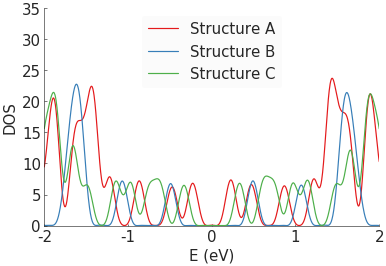

In [17]:
kpmA = pb.kpm(arm_gra_A)
kpmB = pb.kpm(arm_gra_B)
kpmC = pb.kpm(arm_gra_C)

dosA = kpmA.calc_dos(energy=np.linspace(-2.7, 2.7, 1500), broadening=0.06, num_random=16**2)
dosB = kpmB.calc_dos(energy=np.linspace(-2.7, 2.7, 1500), broadening=0.06, num_random=16**2)
dosC = kpmC.calc_dos(energy=np.linspace(-2.7, 2.7, 1500), broadening=0.06, num_random=16**2)


dosA.plot(label="Structure A")
dosB.plot(label="Structure B")
dosC.plot(label="Structure C")

plt.xlim(-2,2)
pb.pltutils.legend()

## Spatial LDOS_usingKPM

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:01 / ETA: 0:00:00


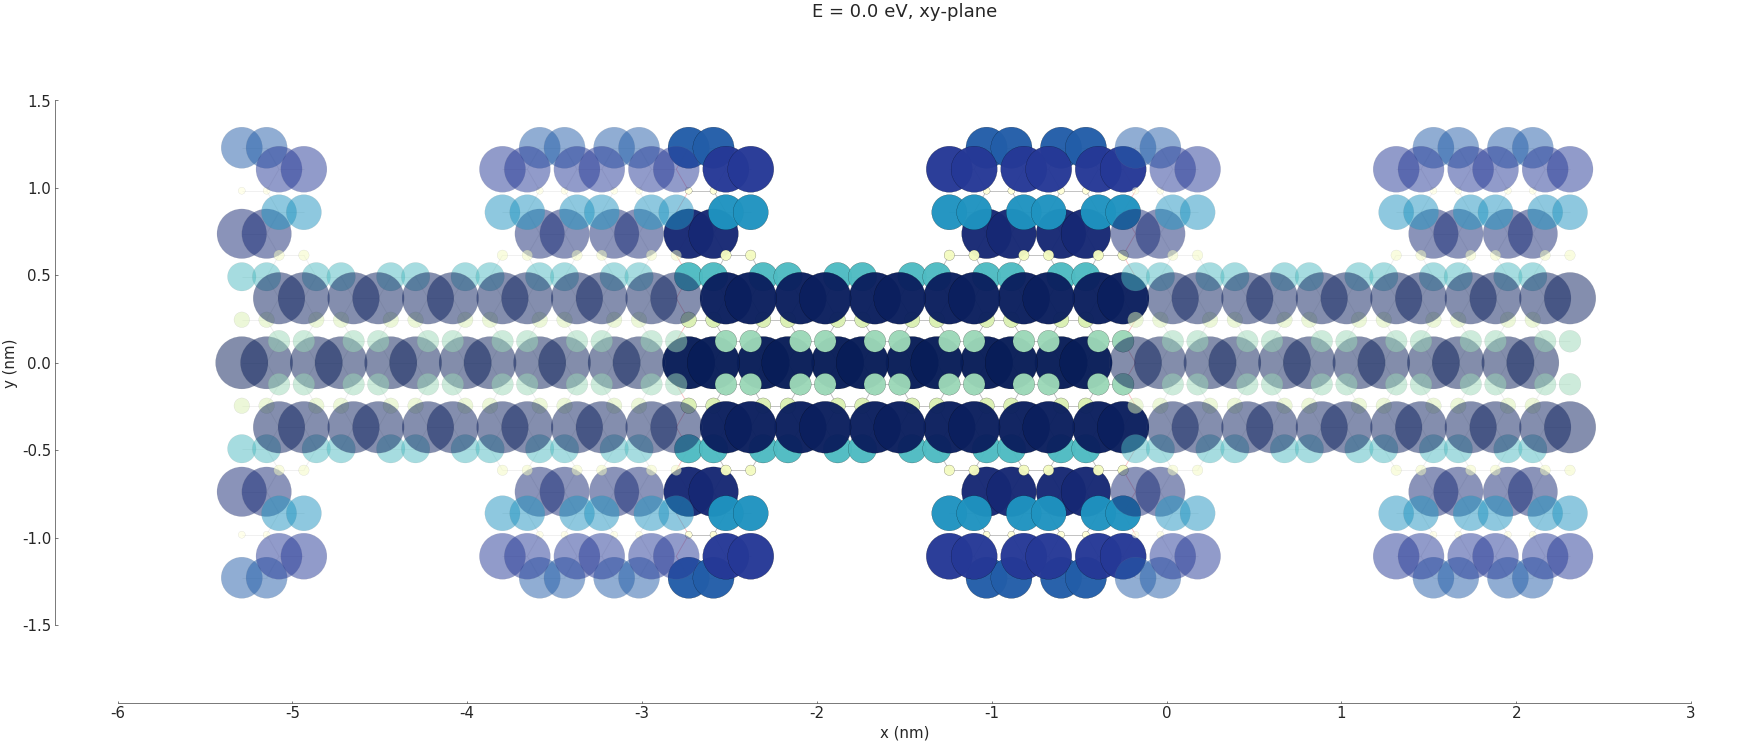

In [18]:
kpm = pb.kpm(arm_gra_A)
spatial_ldos = kpm.calc_spatial_ldos(energy=np.linspace(-3, 3, 100), broadening=0.2,  # eV
                                     shape = supercell_A)  # only within the shape
plt.figure(figsize=(67, 60))
gridspec = plt.GridSpec(2, 2, height_ratios=[1, 0.3], hspace=0)

energies = [0.0, 2, 0.0, 2]  # eV
planes = ["xy"]

for g, energy, axes in zip(gridspec, energies, planes):
    plt.subplot(g, title="E = {} eV, {}-plane".format(energy, axes))
    smap = spatial_ldos.structure_map(energy)
    smap.plot(site_radius=(0.02, 0.15), axes=axes)


In [82]:
kpm = pb.kpm(arm_gra_B)
spatial_ldos = kpm.calc_spatial_ldos(energy=np.linspace(-3, 3, 100), broadening=0.2,  # eV
                                     shape = supercell_B)  # only within the shape
plt.figure(figsize=(67, 60))
gridspec = plt.GridSpec(2, 2, height_ratios=[1, 0.3], hspace=0)

energies = [0.0, 2, 0.0, 2]  # eV
planes = ["xy"]

for g, energy, axes in zip(gridspec, energies, planes):
    plt.subplot(g, title="E = {} eV, {}-plane".format(energy, axes))
    smap = spatial_ldos.structure_map(energy)
    smap.plot(site_radius=(0.02, 0.15), axes=axes)


NameError: name 'supercell_B' is not defined

In [80]:
kpm = pb.kpm(arm_gra_C)
spatial_ldos = kpm.calc_spatial_ldos(energy=np.linspace(-3, 3, 100), broadening=0.2,  # eV
                                     shape = supercell_B)  # only within the shape
plt.figure(figsize=(67, 60))
gridspec = plt.GridSpec(2, 2, height_ratios=[1, 0.3], hspace=0)

energies = [0.0, 2, 0.0, 2]  # eV
planes = ["xy"]

for g, energy, axes in zip(gridspec, energies, planes):
    plt.subplot(g, title="E = {} eV, {}-plane".format(energy, axes))
    smap = spatial_ldos.structure_map(energy)
    smap.plot(site_radius=(0.02, 0.15), axes=axes)


NameError: name 'supercell_B' is not defined

## Bandstructure

In [29]:
def armchair(w1,w2,w3,w4,e1):
    #w1, w2 is width of each area on the potential changing direction
    #w3 is only for kink, it determines the width of gradual changing area
    #w4 is width of none potential changnig direction
    #e1 is magnitute of the potential
    plt.figure(figsize=(20,20))
        
    plt.subplot(231)
    solver = pb.solver.lapack(arm_gra_A)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [-math.pi/leng, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-1.5,1.5)
    
    plt.subplot(234)
    arm_gra_A.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")
    
# -----------------------------------------   
    
    plt.subplot(232)
    solver = pb.solver.lapack(arm_gra_B)
    eigenvalues = solver.eigenvalues

    a_cc = graphene.a_cc
    Gamma = [-math.pi/leng, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-1.5,1.5)
  
    plt.subplot(235)
    arm_gra_B.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")  
    
# -----------------------------------------
    plt.subplot(233)
    solver = pb.solver.lapack(arm_gra_C)
    eigenvalues = solver.eigenvalues
    
    a_cc = graphene.a_cc
    Gamma = [-math.pi/leng, 0]
    K1 = [0, 0]
    bands = solver.calc_bands(K1, Gamma)
    bands.plot(point_labels=['K', r'$\Gamma$'])
    plt.ylim(-2,2)
   
    plt.subplot(236)
    arm_gra_C.onsite_map.plot(cmap="coolwarm", site_radius=0.04,num_periods=0)
    pb.pltutils.colorbar(label="U (eV)")

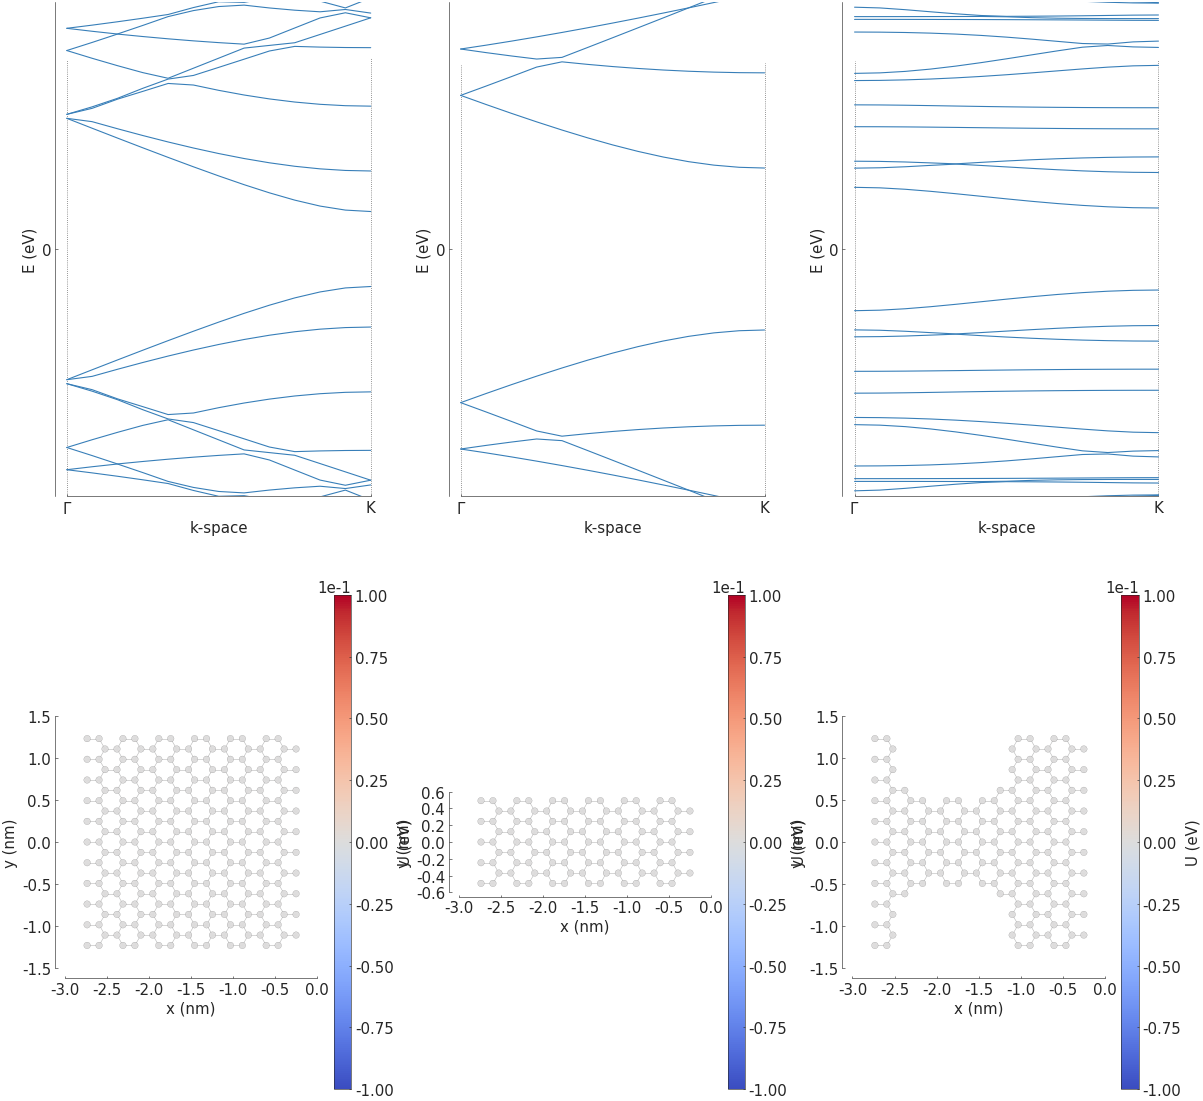

In [30]:
armchair(2,2,0.5,2,1*0.066*math.pi)